<a href="https://colab.research.google.com/github/Mustafa-Dara-Ozevin/ML_Algorithms_on_Kaggle_Datasets/blob/master/Copy_of_Student_Grade_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import copy
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [0]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
print(df.shape)
print(df.isnull().sum())
print(df.isna().sum())


(395, 33)
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
h

In [0]:
cat_columns = df.select_dtypes(['object'])
cat_columns = cat_columns.astype('category')
df[df.select_dtypes(['object']).columns] = cat_columns
df.dtypes

school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

In [0]:
cat_columns = df.select_dtypes(['category']).columns

df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


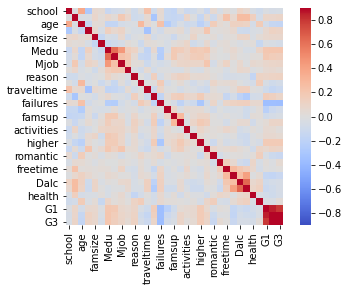

In [0]:
corrmat = df.corr()
sns.heatmap(corrmat, vmin=-.9, vmax=.9, square=True, cmap = 'coolwarm')

In [0]:
X = df.drop(labels=['G3'],axis=1)
y = df['G3']
y.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X, y)
feature_importances = gbr.feature_importances_

X_opt = X.copy()
removed_columns = pd.DataFrame()
models = []
r2_opt = []

for i in range(0,30):
    least_important = np.argmin(feature_importances)
    removed_columns = removed_columns.append(X_opt.pop(X_opt.columns[least_important]))
    gbr.fit(X_opt, y)
    feature_importances = gbr.feature_importances_
    accuracies = cross_val_score(gbr,
                                 X = X_opt,
                                 y = y, cv = 3,
                                 scoring = 'r2')
    r2_opt = np.append(r2_opt, accuracies.mean())
    models = np.append(models, ", ".join(list(X_opt)))
    
feature_selection = pd.DataFrame({'Features':models,'r2 Score':r2_opt})
feature_selection.head(30)

,Features,r2 Score
0,"school, sex, age, famsize, Pstatus, Medu, Fedu...",0.779037
1,"school, sex, age, famsize, Medu, Fedu, Mjob, F...",0.777761
2,"school, sex, age, famsize, Medu, Fedu, Mjob, F...",0.779615
3,"school, age, famsize, Medu, Fedu, Mjob, Fjob, ...",0.781553
4,"age, famsize, Medu, Fedu, Mjob, Fjob, reason, ...",0.779977
5,"age, famsize, Medu, Fedu, Mjob, Fjob, reason, ...",0.781200
6,"age, famsize, Medu, Fedu, Mjob, Fjob, reason, ...",0.776989
7,"age, famsize, Medu, Fedu, Mjob, Fjob, reason, ...",0.776465
8,"age, famsize, Medu, Fedu, Mjob, Fjob, reason, ...",0.777825
9,"age, Medu, Fedu, Mjob, Fjob, reason, guardian,...",0.776363


In [0]:
for j in range(25):
  print(feature_selection.iloc[j,0])

school, sex, age, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2
school, sex, age, famsize, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2
school, sex, age, famsize, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2
school, age, famsize, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2
age, famsize, Medu, Fedu, Mjob, Fjob, reason, guardian, travel

In [0]:
scaler = StandardScaler()
df_transformed = scaler.fit_transform(df[['age','absences','G2']])
X_best = pd.DataFrame(df_transformed)

y = df['G3']
X_best.columns = ['age','absences','G2']


X_best.tail()

,age,absences,G2
390,2.592380,0.661975,-0.456226
391,0.238380,-0.338906,1.407091
392,3.377047,-0.338906,-0.722415
393,1.023046,-0.714236,0.342338
394,1.807713,-0.088686,-0.456226


In [0]:
def print_results(results): # Function for printing results from GridSearchCV
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [0]:
gbr = GradientBoostingRegressor()
params_gbr ={
    'learning_rate':[0.01,0.1,1],
    'n_estimators': [150,300],
    'max_depth': [3]
}
cv_gbr = GridSearchCV(gbr,params_gbr,cv=5,n_jobs=-1)
cv_gbr.fit(X_best,y) 
print_results(cv_gbr)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}

0.785 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
0.831 (+/-0.038) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.825 (+/-0.043) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
0.822 (+/-0.051) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.746 (+/-0.112) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 150}
0.727 (+/-0.128) for {'learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}


In [0]:
svr = SVR( )
params_svr ={
    'C':[0.01,0.1,1,10],
    'epsilon': [0.01,0.1,1],
    'kernel': ['rbf','linear']
}
cv_svr = GridSearchCV(svr,params_svr,cv=5,n_jobs=-1)
cv_svr.fit(X_best,y) 
print_results(cv_svr)

BEST PARAMS: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}

0.04 (+/-0.051) for {'C': 0.01, 'epsilon': 0.01, 'kernel': 'rbf'}
0.599 (+/-0.182) for {'C': 0.01, 'epsilon': 0.01, 'kernel': 'linear'}
0.043 (+/-0.051) for {'C': 0.01, 'epsilon': 0.1, 'kernel': 'rbf'}
0.599 (+/-0.182) for {'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}
0.039 (+/-0.044) for {'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}
0.563 (+/-0.179) for {'C': 0.01, 'epsilon': 1, 'kernel': 'linear'}
0.478 (+/-0.243) for {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.18) for {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
0.474 (+/-0.239) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'rbf'}
0.805 (+/-0.185) for {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
0.459 (+/-0.21) for {'C': 0.1, 'epsilon': 1, 'kernel': 'rbf'}
0.808 (+/-0.18) for {'C': 0.1, 'epsilon': 1, 'kernel': 'linear'}
0.762 (+/-0.154) for {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
0.808 (+/-0.18) for {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
0.765 (+/-0.148)

In [0]:
y_pred_svr = pd.DataFrame(cv_svr.predict(X_best))
y_pred_svr.columns = ['prediction_svr']
df = df.join(y_pred_svr)

y_pred_gbr = pd.DataFrame(cv_gbr.predict(X_best))
y_pred_gbr.columns = ['prediction_gbr']
df = df.join(y_pred_gbr)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,prediction_svr,prediction_gbr
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,6.747521,6.516469
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,4.860808,6.117270
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,7.941731,8.883512
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,13.990203,13.936148
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,10.027405,10.249546


In [0]:
print(df[['G3','prediction_svr','prediction_gbr']].corr())

                      G3  prediction_svr  prediction_gbr
G3              1.000000        0.936661        0.950696
prediction_svr  0.936661        1.000000        0.984380
prediction_gbr  0.950696        0.984380        1.000000


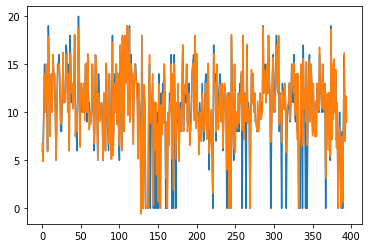

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_pred_svr)
plt.show()


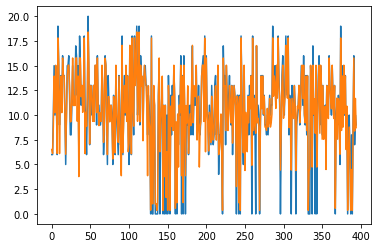

In [0]:
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_pred_gbr)
plt.show()
